Bagian Import import

In [4]:
import pandas as pd
import cv2
import numpy as np


Contoh ambil gambar

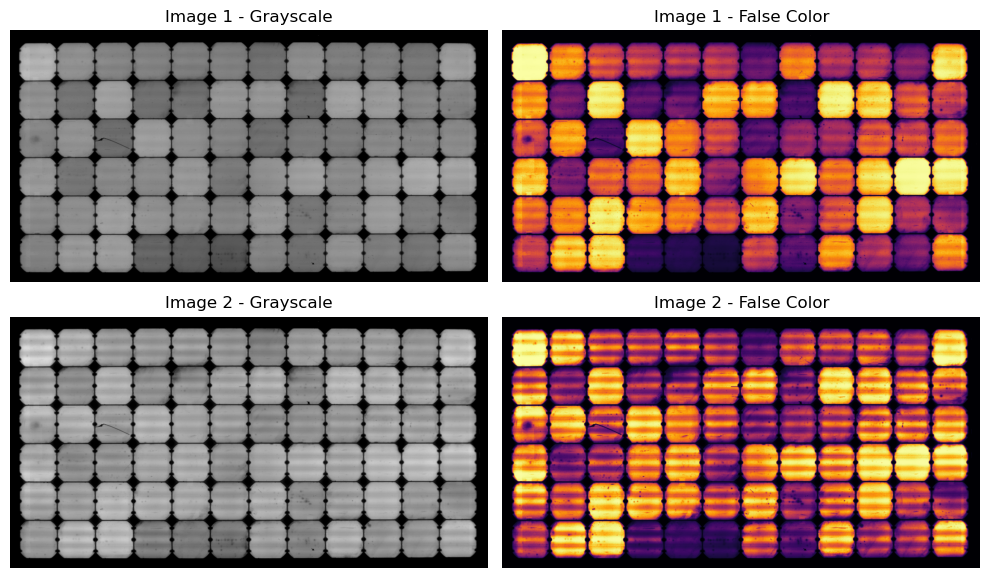

In [5]:
import cv2
import matplotlib.pyplot as plt

# ====== PATH GAMBAR ======
img_path_1 = r"C:\Users\Ghozy Abror\OneDrive - Institut Teknologi Bandung\Karirku\UNSW\Thesis\Coding\EL\EL_wrp\2529_36_1_08062019_20_wrp.tiff"
img_path_2 = r"C:\Users\Ghozy Abror\OneDrive - Institut Teknologi Bandung\Karirku\UNSW\Thesis\Coding\EL\EL_wrp\2529_36_1_08062019_80_wrp.tiff"

# ====== FUNGSI FALSE COLOR ======
def false_color(img_path, colormap=cv2.COLORMAP_INFERNO):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Gambar tidak ditemukan: {img_path}")
    
    # Enhance contrast (optional tapi direkomendasikan)
    img_eq = cv2.equalizeHist(img)
    
    # Apply colormap
    fc = cv2.applyColorMap(img_eq, colormap)
    return img, fc

# ====== PROSES DUA GAMBAR ======
img1_gray, img1_fc = false_color(img_path_1, cv2.COLORMAP_INFERNO)
img2_gray, img2_fc = false_color(img_path_2, cv2.COLORMAP_INFERNO)

# ====== TAMPILKAN ======
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.title("Image 1 - Grayscale")
plt.imshow(img1_gray, cmap="gray")
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Image 1 - False Color")
plt.imshow(cv2.cvtColor(img1_fc, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2,2,3)
plt.title("Image 2 - Grayscale")
plt.imshow(img2_gray, cmap="gray")
plt.axis("off")

plt.subplot(2,2,4)
plt.title("Image 2 - False Color")
plt.imshow(cv2.cvtColor(img2_fc, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()


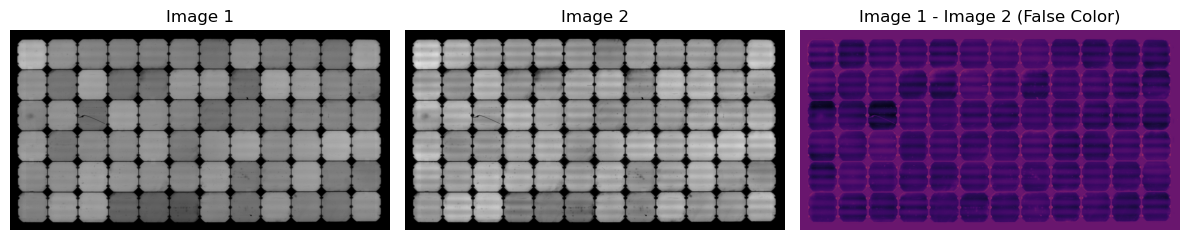

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# ====== BACA GAMBAR (GRAYSCALE) ======
img1 = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img_path_2, cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise FileNotFoundError("Salah satu gambar tidak ditemukan")

# ====== PASTIKAN UKURAN SAMA ======
if img1.shape != img2.shape:
    raise ValueError("Ukuran gambar tidak sama")

# ====== KONVERSI KE FLOAT (PENTING) ======
img1_f = img1.astype(np.float32)
img2_f = img2.astype(np.float32)

# ====== IMAGE SUBTRACTION ======
diff = img1_f - img2_f   # bisa negatif

# ====== NORMALISASI KE 0–255 UNTUK DISPLAY ======
diff_norm = cv2.normalize(
    diff, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX
).astype(np.uint8)

# ====== FALSE COLOR (OPSIONAL) ======
diff_color = cv2.applyColorMap(diff_norm, cv2.COLORMAP_INFERNO)

# ====== TAMPILKAN ======
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Image 1")
plt.imshow(img1, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Image 2")
plt.imshow(img2, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Image 1 - Image 2 (False Color)")
plt.imshow(cv2.cvtColor(diff_color, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()




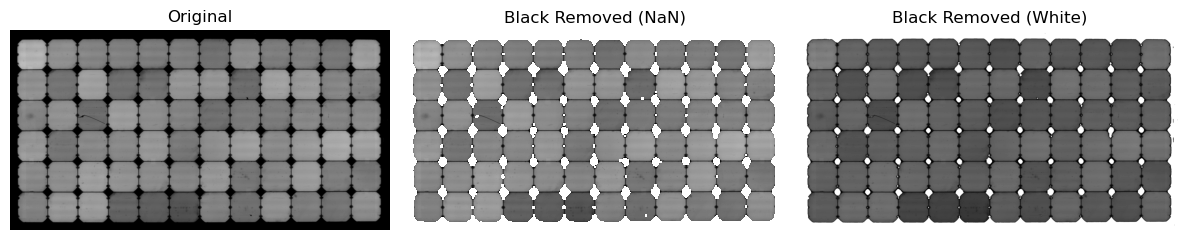

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



# ====== BACA GAMBAR (GRAYSCALE) ======
img = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan")

# ====== BUAT MASK: pixel > 0 ======
mask = img > 0   # True untuk pixel non-hitam

# ====== OPSI 1: SET PIXEL HITAM JADI NaN (untuk analisis) ======
img_nan = img.astype(np.float32)
img_nan[~mask] = np.nan

# ====== OPSI 2: SET PIXEL HITAM JADI PUTIH (untuk visualisasi) ======
img_white = img.copy()
img_white[~mask] = 255

# ====== TAMPILKAN ======
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Black Removed (NaN)")
plt.imshow(img_nan, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Black Removed (White)")
plt.imshow(img_white, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()



Detected cells: 72


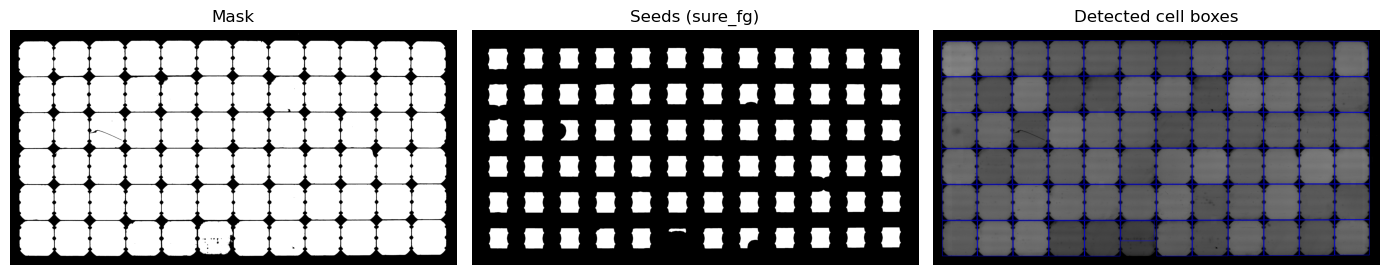

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 1) Read grayscale
img = cv2.imread(img_path_1, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(img_path)

# 2) Mask area aktif (buang background hitam)
#    Otsu biasanya works karena background sangat gelap
_, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Optional: bersihkan noise kecil
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8), iterations=1)

# 3) "Close" agar lubang/celah tipis di dalam cell ketutup,
#    tapi jangan terlalu besar biar antar-cell tidak nyambung total
mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((9,9), np.uint8), iterations=1)

# 4) Distance transform untuk cari "center" tiap cell
dist = cv2.distanceTransform(mask_closed, cv2.DIST_L2, 5)
dist_norm = cv2.normalize(dist, None, 0, 1.0, cv2.NORM_MINMAX)

# Threshold seed (marker) — angka ini paling sering perlu kamu tuning (0.35–0.6)
_, sure_fg = cv2.threshold(dist_norm, 0.45, 1.0, cv2.THRESH_BINARY)
sure_fg = (sure_fg * 255).astype(np.uint8)

# 5) Background pasti (sure_bg) dan area unknown
sure_bg = cv2.dilate(mask_closed, np.ones((5,5), np.uint8), iterations=2)
unknown = cv2.subtract(sure_bg, sure_fg)

# 6) Label markers
num_labels, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1            # supaya background bukan 0
markers[unknown == 255] = 0      # unknown = 0

# 7) Watershed butuh input BGR
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
markers_ws = cv2.watershed(img_bgr, markers)

# 8) Ambil contour tiap cell (label > 1)
labels = np.unique(markers_ws)
cell_boxes = []
vis = img_bgr.copy()

for lab in labels:
    if lab <= 1:  # -1 boundary, 1 background
        continue
    cell_mask = (markers_ws == lab).astype(np.uint8) * 255

    # cari contour terbesar pada label ini
    cnts, _ = cv2.findContours(cell_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not cnts:
        continue
    c = max(cnts, key=cv2.contourArea)
    area = cv2.contourArea(c)
    if area < 500:  # filter noise kecil, sesuaikan kalau perlu
        continue

    x,y,w,h = cv2.boundingRect(c)
    cell_boxes.append((x,y,w,h))
    #cv2.rectangle(vis, (x,y), (x+w, y+h), (0,255,0), 1)
    cv2.rectangle(vis, (x,y), (x+w, y+h), (255,0,0), 3)  # BGR = merah


print("Detected cells:", len(cell_boxes))

# 9) Tampilkan hasil
plt.figure(figsize=(14,4))
plt.subplot(1,3,1); plt.title("Mask"); plt.imshow(mask, cmap="gray"); plt.axis("off")
plt.subplot(1,3,2); plt.title("Seeds (sure_fg)"); plt.imshow(sure_fg, cmap="gray"); plt.axis("off")
plt.subplot(1,3,3); plt.title("Detected cell boxes"); plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)); plt.axis("off")
plt.tight_layout(); plt.show()

# 10) (Opsional) crop & simpan tiap cell
# out_dir = r"C:\path\to\save\cells"
# import os; os.makedirs(out_dir, exist_ok=True)
# for i,(x,y,w,h) in enumerate(sorted(cell_boxes, key=lambda b:(b[1], b[0]))):
#     crop = img[y:y+h, x:x+w]
#     cv2.imwrite(os.path.join(out_dir, f"cell_{i:03d}.png"), crop)


Raw boxes: 72
Uniform boxes: 71


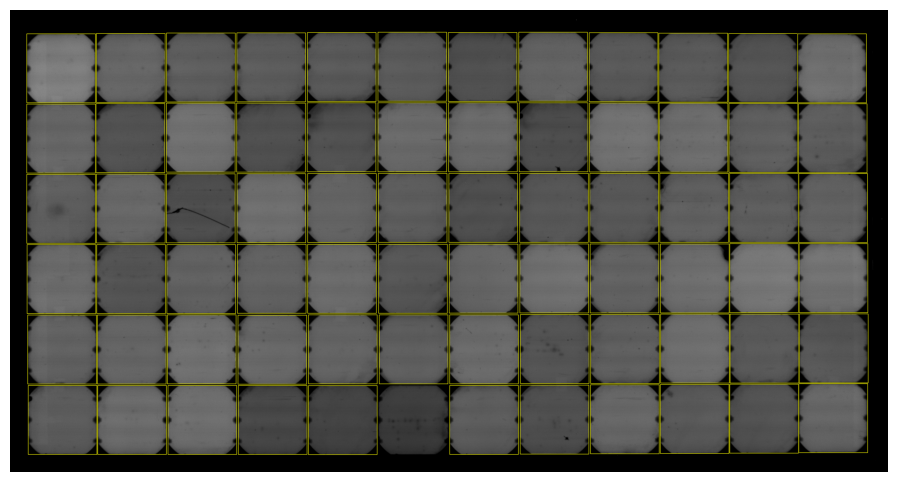

In [15]:
import numpy as np
import cv2

def make_uniform_boxes(cell_boxes, img_shape,
                       size_tol=0.25,   # toleransi ukuran ±25%
                       min_area=500,    # filter noise kecil
                       nms_iou=0.6):    # buang duplikat box
    """
    cell_boxes: list of (x,y,w,h) hasil deteksi awal (boleh tidak seragam)
    img_shape: (H,W) dari gambar grayscale asli
    return: uniform_boxes (x,y,w,h) ukuran seragam
    """
    H, W = img_shape[:2]

    # --- 1) basic filter area ---
    boxes = []
    for x, y, w, h in cell_boxes:
        if w * h >= min_area:
            boxes.append((x, y, w, h))
    if len(boxes) == 0:
        return []

    boxes = np.array(boxes, dtype=np.float32)
    xs, ys, ws, hs = boxes[:,0], boxes[:,1], boxes[:,2], boxes[:,3]

    # --- 2) ukuran standar pakai median (robust) ---
    w_std = float(np.median(ws))
    h_std = float(np.median(hs))

    # --- 3) buang outlier ukuran (yang kepotong/aneh) ---
    good = (
        (ws >= (1 - size_tol) * w_std) & (ws <= (1 + size_tol) * w_std) &
        (hs >= (1 - size_tol) * h_std) & (hs <= (1 + size_tol) * h_std)
    )
    boxes = boxes[good]
    if len(boxes) == 0:
        return []

    # --- 4) standardize: buat box baru ukuran (w_std,h_std) berdasarkan center ---
    uniform = []
    for x, y, w, h in boxes:
        cx = x + w / 2.0
        cy = y + h / 2.0

        x2 = int(round(cx - w_std / 2.0))
        y2 = int(round(cy - h_std / 2.0))
        w2 = int(round(w_std))
        h2 = int(round(h_std))

        # clamp supaya tidak keluar gambar
        x2 = max(0, min(W - w2, x2))
        y2 = max(0, min(H - h2, y2))

        uniform.append((x2, y2, w2, h2))

    # --- 5) NMS sederhana untuk buang box duplikat ---
    def iou(a, b):
        ax, ay, aw, ah = a
        bx, by, bw, bh = b
        ax2, ay2 = ax + aw, ay + ah
        bx2, by2 = bx + bw, by + bh

        inter_x1 = max(ax, bx)
        inter_y1 = max(ay, by)
        inter_x2 = min(ax2, bx2)
        inter_y2 = min(ay2, by2)
        iw = max(0, inter_x2 - inter_x1)
        ih = max(0, inter_y2 - inter_y1)
        inter = iw * ih
        union = aw * ah + bw * bh - inter
        return inter / union if union > 0 else 0

    uniform = sorted(uniform, key=lambda b: (b[1], b[0]))  # sort top-left

    kept = []
    for b in uniform:
        if all(iou(b, k) < nms_iou for k in kept):
            kept.append(b)

    return kept


# ====== CONTOH PEMAKAIAN ======
# cell_boxes = hasil deteksi awal dari watershed/contour
# img = gambar grayscale asli (np array)
uniform_boxes = make_uniform_boxes(cell_boxes, img.shape, size_tol=0.25, min_area=800, nms_iou=0.6)

print("Raw boxes:", len(cell_boxes))
print("Uniform boxes:", len(uniform_boxes))

# Visualisasi box tebal (biar jelas)
vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for (x,y,w,h) in uniform_boxes:
    # double border biar kontras
    cv2.rectangle(vis, (x-1,y-1), (x+w+1, y+h+1), (0,0,0), 4)
    cv2.rectangle(vis, (x,y), (x+w, y+h), (0,255,255), 2)

# tampilkan via matplotlib (kalau di notebook)
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
